# Filtering list of Low hotwater

Create a list of building ideas to remove

In [91]:
import pandas as pd
import seaborn as sns
import gc
import matplotlib.pyplot as plt
%matplotlib inline

gc.collect()

2826

0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'

In [3]:
combDF = pd.read_csv("../data/combDF.csv")
combDF['timestamp'] = pd.to_datetime(combDF.timestamp)
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [4]:
combDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20125605 entries, 0 to 20125604
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   site_id             int64         
 1   building_id         int64         
 2   primary_use         object        
 3   square_feet         int64         
 4   year_built          float64       
 5   floor_count         float64       
 6   meter               int64         
 7   timestamp           datetime64[ns]
 8   meter_reading       float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  hour                int64         
 17  weekday             int64         
 18  month               int64         
dtypes: datetime64[ns](1), float64(10), int64

In [5]:
len(combDF[combDF['meter_reading'] <= 0])

1867887

In [6]:
len(combDF[combDF['meter_reading'] < 0])/len(combDF.index)

0.0

In [7]:
len(combDF[combDF['meter_reading'] <= 0])/len(combDF.index)

0.09281147076075477

9.3% of values are zero

In [8]:
#counting percentage of zero readings
g = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
g.groupby('meter').describe()
#do boxplot

building_id                                                           \
            count         mean         std    min     25%     50%      75%   
meter                                                                        
0          1413.0   714.958953  418.115709    0.0  353.00   706.0  1073.00   
1           498.0   890.574297  437.162240    7.0  747.25   992.5  1249.75   
2           324.0  1115.043210  203.054244  745.0  940.00  1136.0  1296.25   
3           145.0   738.131034  510.722137  106.0  212.00  1003.0  1255.00   

              meter_reading                                               \
          max         count      mean       std  min       25%       50%   
meter                                                                      
0      1448.0        1413.0  0.043903  0.119885  0.0  0.000000  0.000000   
1      1413.0         498.0  0.154577  0.227096  0.0  0.005546  0.028910   
2      1442.0         324.0  0.126838  0.196130  0.0  0.008466  0.028500   
3      1331.0         145.0  0.269017  0.294540  0.0  0.011522  0.132164   

                           
            75%       max  
meter                      
0      0.015486  0.935206  
1      0.208923  0.999886  
2      0.138303  0.971744  
3      0.482861  0.995104

In [52]:
g[g>0.95].count()/g.count()

building_id      0.999580
meter            0.406303
meter_reading    0.002521
dtype: float64

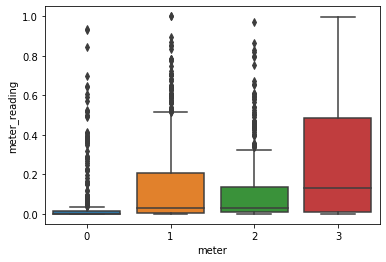

In [53]:
#make boxplot by meter type
sns.boxplot(data=g,x='meter', y='meter_reading')

In [83]:
g[(g.meter_reading>0.3) & (g.meter == 3)].count()

building_id      54
meter            54
meter_reading    54
dtype: int64

In [68]:
x = g[(g.meter_reading>0.3) & (g.meter == 3)]

In [69]:
hotwater_meters = x.building_id
hotwater_meters

131      106
135      109
139      112
143      114
171      138
173      139
179      144
203      163
211      167
222      171
231      175
234      176
237      177
250      183
258      187
268      191
277      195
286      200
302      206
327      216
330      217
336      220
355      228
372      236
388      244
405      250
414      254
417      255
433      263
436      264
460      279
469      284
476      287
1029     794
1435     998
1439    1000
1445    1003
1456    1011
1458    1012
1467    1017
1474    1021
1477    1022
1485    1028
1886    1237
1914    1246
1949    1258
1956    1260
1960    1262
1983    1270
2042    1293
2075    1302
2113    1318
2116    1319
2129    1324
Name: building_id, dtype: int64

need to remove spikes

In [70]:
no_spike_combDF = combDF[(combDF.meter_reading<=20000) & (combDF.meter == 3)]
no_spike_combDF.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
20124272,15,1331,Education,171008,1930.0,NaN,3,2016-12-06 11:00:00,7404.01,-5.0,0.0,-6.1,NaN,1020.3,70.0,2.1,11,1,12
20124337,15,1331,Education,171008,1930.0,NaN,3,2016-12-06 12:00:00,8309.50,-4.4,4.0,-5.6,NaN,1020.4,70.0,2.6,12,1,12
20124402,15,1331,Education,171008,1930.0,NaN,3,2016-12-06 13:00:00,8246.92,-3.9,4.0,-4.4,NaN,1020.2,80.0,2.6,13,1,12
20124467,15,1331,Education,171008,1930.0,NaN,3,2016-12-06 14:00:00,9519.63,-1.1,0.0,-1.7,NaN,1020.0,70.0,2.1,14,1,12
20124532,15,1331,Education,171008,1930.0,NaN,3,2016-12-06 15:00:00,9558.61,0.6,0.0,-0.6,NaN,1019.1,130.0,2.1,15,1,12


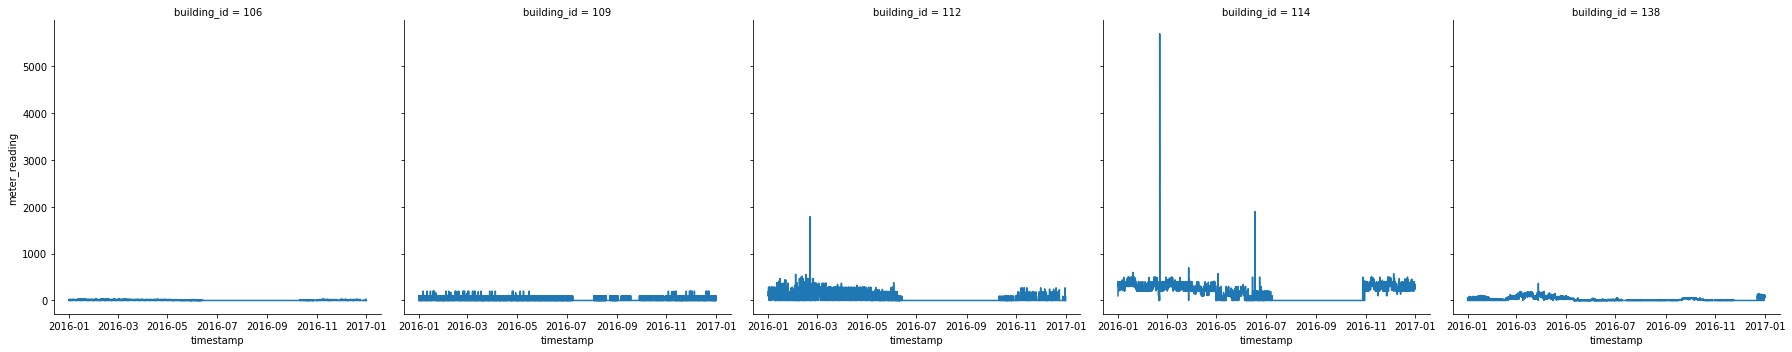

In [71]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(hotwater_meters[0:5])) & (no_spike_combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
               kind="line", data=x)



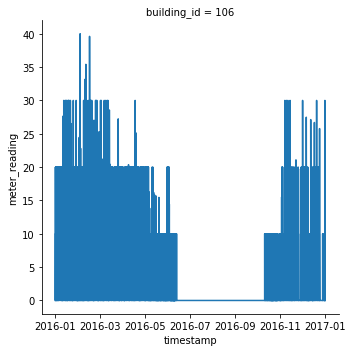

In [88]:
x=combDF[(combDF.building_id == 106) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

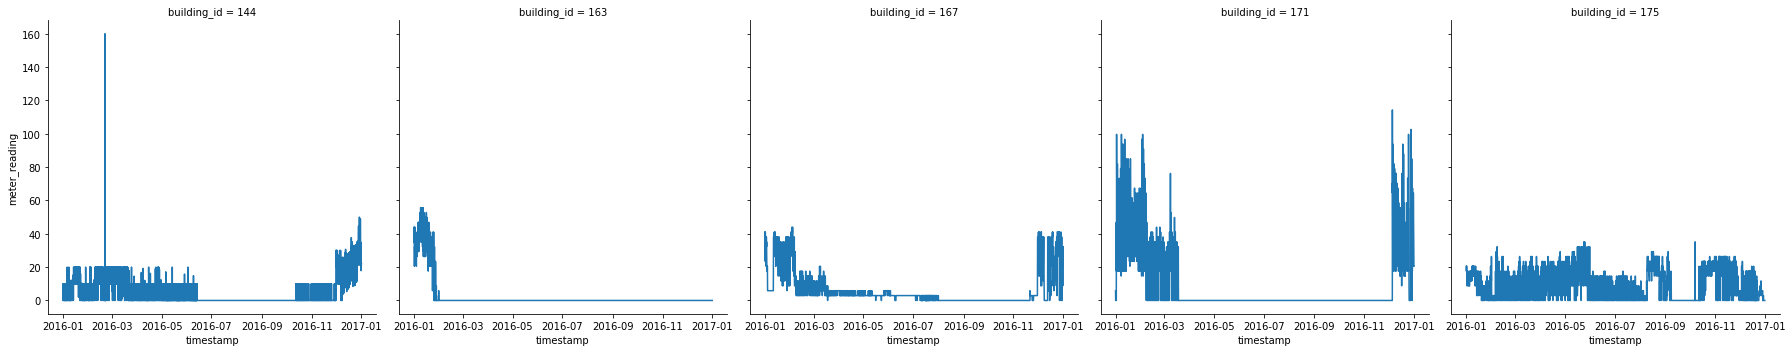

In [72]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(hotwater_meters[6:11])) & (no_spike_combDF.meter == 3)]
k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

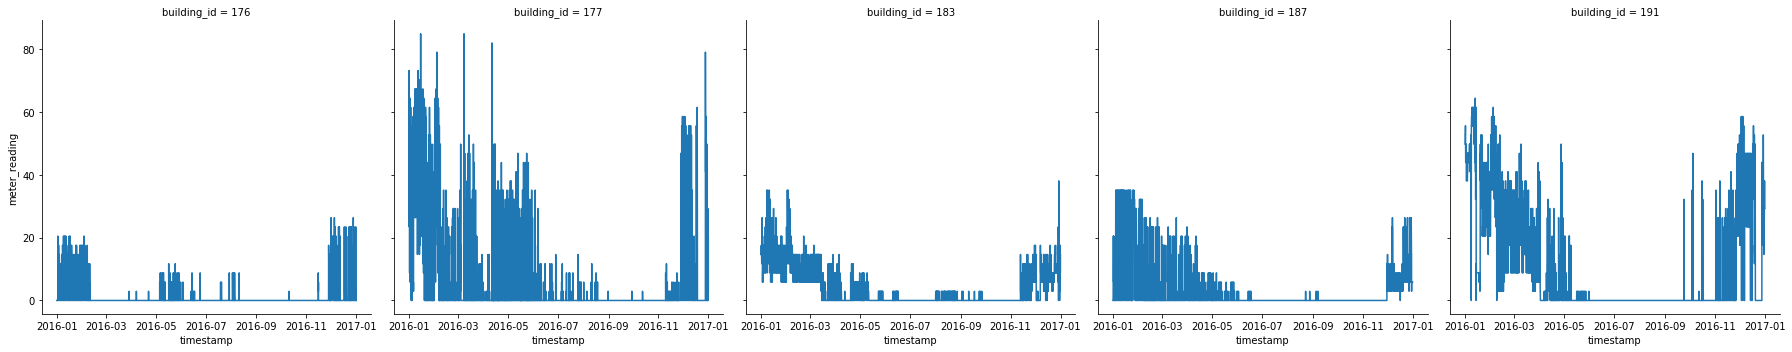

In [73]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(hotwater_meters[11:16])) & (no_spike_combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

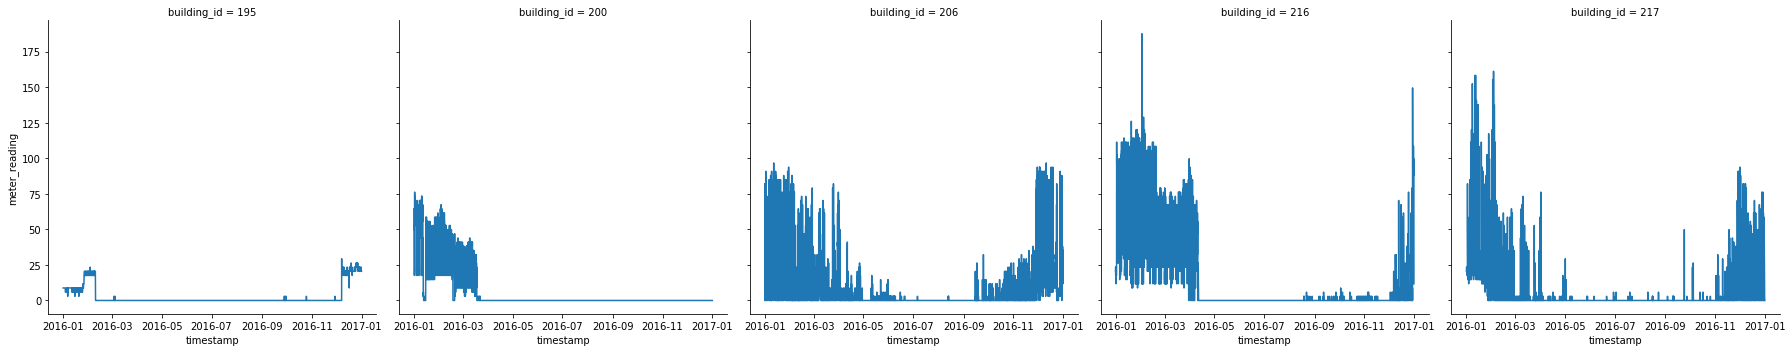

In [74]:
x=no_spike_combDF[(no_spike_combDF.building_id.isin(hotwater_meters[16:21])) & (no_spike_combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

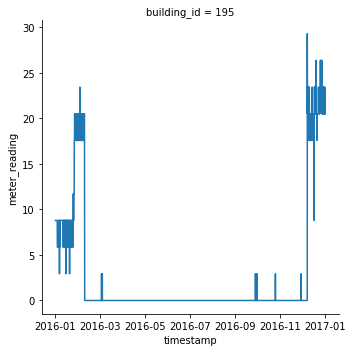

In [85]:
x=combDF[(combDF.building_id == 195) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

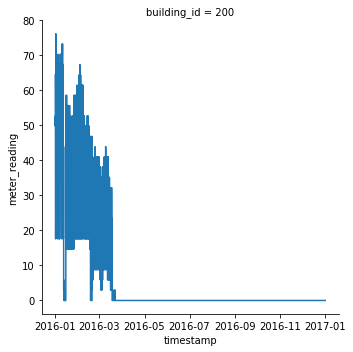

In [86]:
x=combDF[(combDF.building_id == 200) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

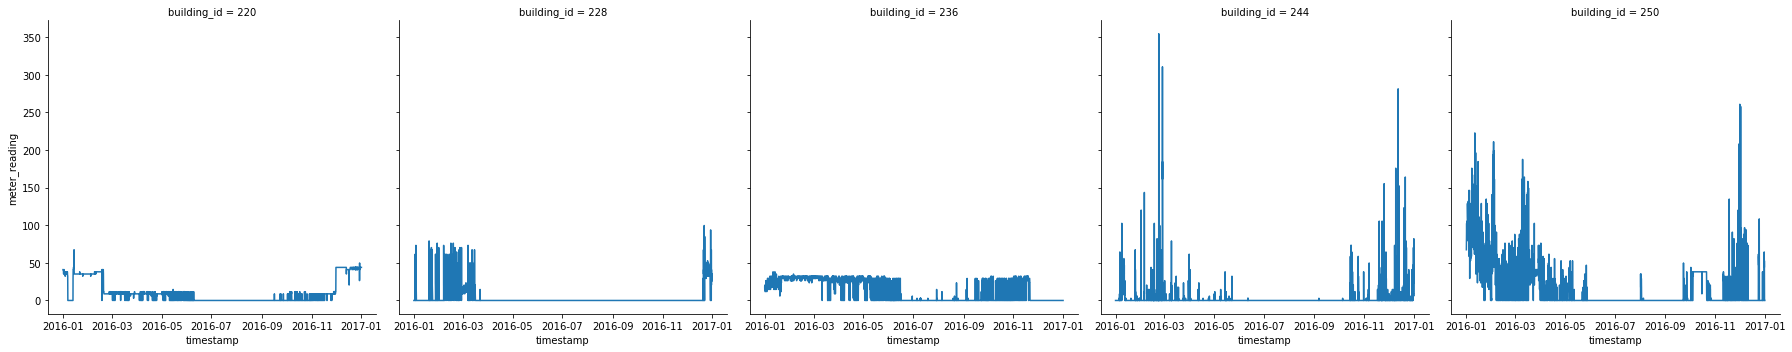

In [75]:
x=combDF[(combDF.building_id.isin(hotwater_meters[21:26])) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

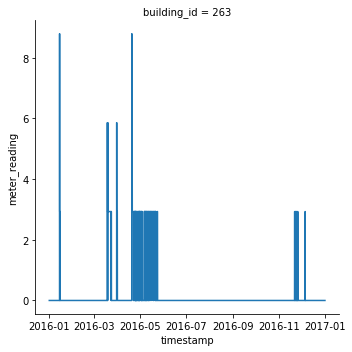

In [76]:
x=combDF[(combDF.building_id == 263) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

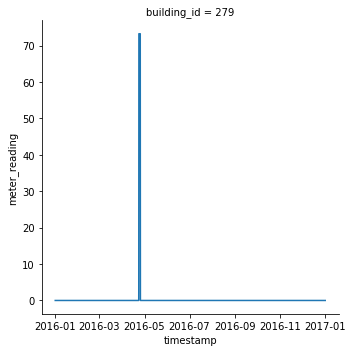

In [77]:
x=combDF[(combDF.building_id == 279) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

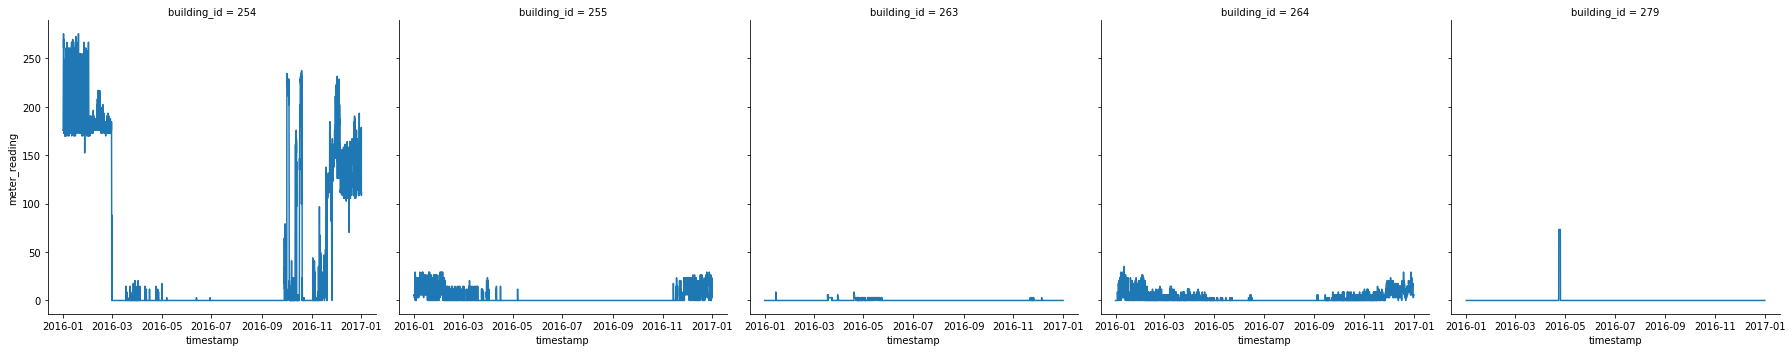

In [78]:
x=combDF[(combDF.building_id.isin(hotwater_meters[26:31])) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

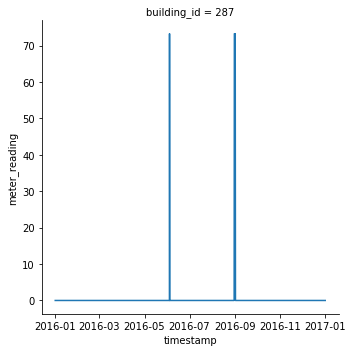

In [42]:
x=combDF[(combDF.building_id == 287) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

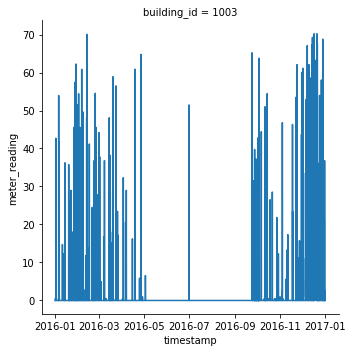

In [43]:
x=combDF[(combDF.building_id == 1003) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

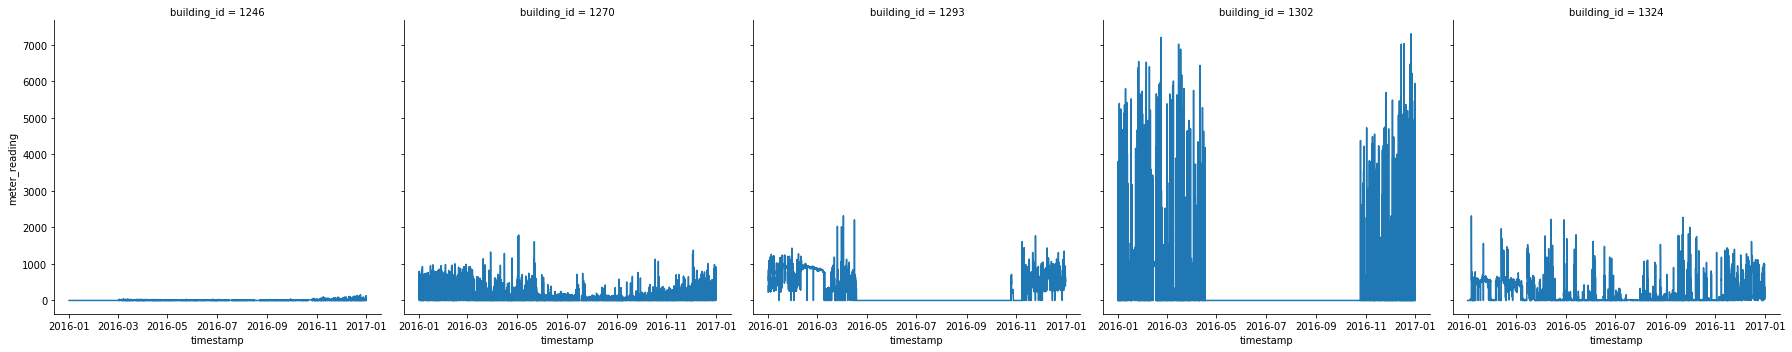

In [66]:
x=combDF[(combDF.building_id.isin(hotwater_meters[31:36])) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

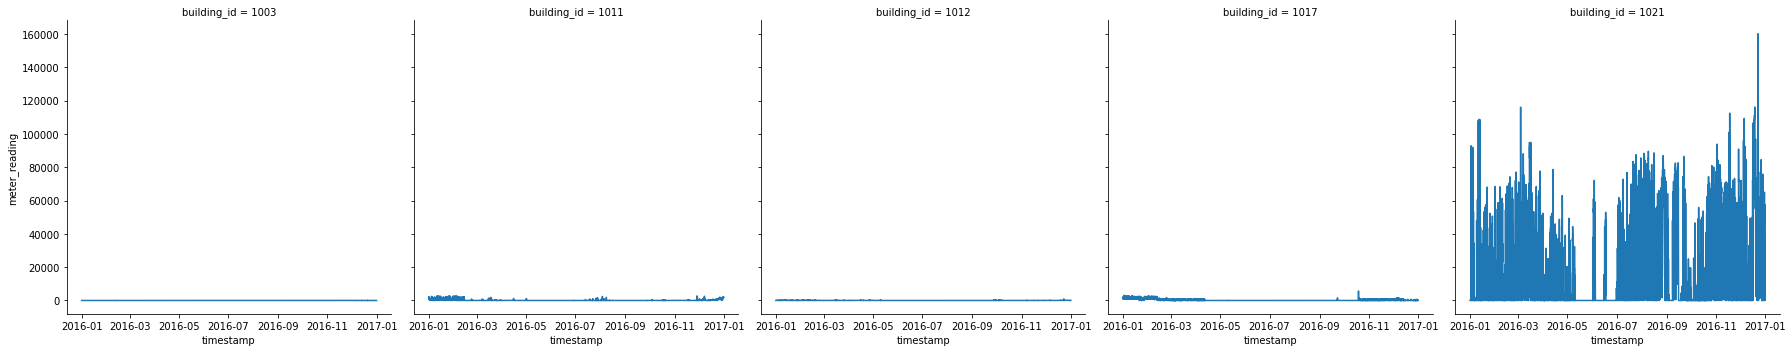

In [80]:
x=combDF[(combDF.building_id.isin(hotwater_meters[36:41])) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

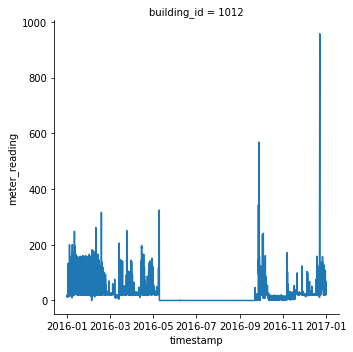

In [82]:
x=combDF[(combDF.building_id == 1012) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

In [46]:
x=combDF[(combDF.building_id == 946) & (combDF.meter == 3)]

k = sns.relplot(x="timestamp", y="meter_reading",
                 col="building_id",
                 kind="line", data=x)

IndexError: index 0 is out of bounds for axis 1 with size 0

<Figure size 0x360 with 0 Axes>

In [87]:
h = combDF.groupby(['building_id','meter'],as_index=False)[['meter_reading']].apply(lambda x: x[x == 0].count()/x.count()).reset_index()
isinstance(g,pd.DataFrame)
#g.reset_index(level=['building_id','meter'],inplace=True)
h.describe()
#do boxplot

,building_id,meter,meter_reading
count,2380.000000,2380.000000,2380.000000
mean,807.582353,0.664286,0.092066
std,429.858323,0.928002,0.184519
min,0.000000,0.000000,0.000000
25%,404.750000,0.000000,0.000000
50%,900.000000,0.000000,0.005254
75%,1194.250000,1.000000,0.057907
max,1448.000000,3.000000,0.999886


In [ ]:
#meters to remove
#195,200,263,279,287

In [93]:
building = {'building_id': [195,200,2673,279,287],
                          'meter':[3,3,3,3,3]
                         }
too_low_hotwater_iter1 = pd.DataFrame(building, columns = ['building_id', 'meter']) 
too_low_hotwater_iter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   building_id  5 non-null      int64
 1   meter        5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [94]:
too_low_hotwater_iter1.to_csv("../data_cleaning/too_low_hotwater_iter1.csv", index = False)